# Optimising trimming

Plot total number of concordantly mapping reads using different Q thresholds for trimming

In [85]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set(style="darkgrid")
sns.set_context("paper")

In [69]:
!scp romanoff:/storage/fin/thesis_clean_data/transcriptome_assembly_and_binning/trimming_optimisation/summary/\*.txt .

bulk_sum_file.txt                             100%  560     0.6KB/s   00:00    
tax_select_sct_q30_sum_file.txt               100%  535     0.5KB/s   00:00    
tax_select_sct_q5_sum_file.txt                100%  530     0.5KB/s   00:00    


In [71]:
pd.read_csv("bulk_sum_file.txt")

,lib,Q0,Q2,Q5,Q10,Q15,Q20,Q25,Q30,Q35,Q40
0,dark1_2,730,730,730,729,727,717,701,672,0,0
1,dark1_3,202,202,200,199,199,196,192,187,0,0
2,dark1_5,85,85,84,84,83,82,78,75,0,0
3,dark2_2,339,339,336,335,332,323,307,289,0,0
4,dark2_3,1225,1225,1216,1210,1196,1159,1103,1008,0,0
5,dark2_6,780,780,772,769,754,726,685,626,0,0
6,dark2_7,310,310,307,303,299,287,272,255,0,0
7,dark2_8,1068,1068,1056,1055,1038,1010,980,908,0,0
8,light1_10,2502,2502,2494,2494,2483,2461,2410,2318,0,0
9,light1_11,3030,3030,3023,3020,3012,2979,2927,2794,0,0


In [73]:
bulk=pd.melt(pd.read_csv("bulk_sum_file.txt"), id_vars="lib")
sctq5=pd.melt(pd.read_csv("tax_select_sct_q5_sum_file.txt"), id_vars="lib")
sctq30=pd.melt(pd.read_csv("tax_select_sct_q30_sum_file.txt"), id_vars="lib") 

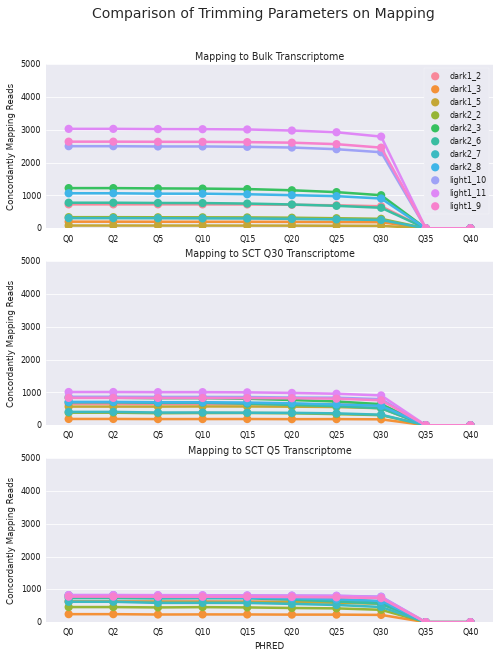

In [94]:
fig = plt.figure(figsize=(8,10))
plt.suptitle("Comparison of Trimming Parameters on Mapping", size=14)
ax1=fig.add_subplot(311)

sns.pointplot(ax=ax1, x="variable", y="value", hue="lib", data=bulk).set(\
            ylim=(0, 5000), ylabel="Concordantly Mapping Reads",  xlabel="", title="Mapping to Bulk Transcriptome")
legend = plt.legend(frameon=True)

ax2=fig.add_subplot(312)



sns.pointplot(ax=ax2, x="variable", y="value", hue="lib", data=sctq30, legend=False).set(\
            ylim=(0, 5000), ylabel="Concordantly Mapping Reads", xlabel="", title="Mapping to SCT Q30 Transcriptome")
ax2.legend_.remove()

ax3=fig.add_subplot(313)
sns.pointplot(ax=ax3,x="variable", y="value", hue="lib", data=sctq5, legend=False).set(\
            ylim=(0, 5000), ylabel="Concordantly Mapping Reads", xlabel="PHRED", title="Mapping to SCT Q5 Transcriptome")

ax3.legend_.remove()

plt.savefig("trimmingopt.svg")

In [61]:
pd.read_csv("bulk_sum_file.txt", index_col=False)


,lib,Q0,Q2,Q5,Q10,Q15,Q20,Q25,Q30,Q35,Q40
0,dark1_2,457,457,455,455,349,455,349,445,NaN,NaN
1,dark1_3,813,812,813,813,770,813,768,777,NaN,NaN
2,dark1_5,778,778,776,776,609,776,606,759,NaN,NaN
3,dark2_2,850,850,847,847,778,845,762,786,NaN,NaN
4,dark2_3,660,659,647,647,561,649,555,597,NaN,NaN
5,dark2_6,721,721,711,711,599,711,586,668,NaN,NaN
6,dark2_7,806,806,795,794,744,789,705,709,NaN,NaN
7,dark2_8,711,711,699,699,628,694,612,665,NaN,NaN
8,light1_10,495,495,495,495,499,496,502,491,NaN,NaN
9,light1_11,360,360,359,359,509,360,511,348,NaN,NaN


In [ ]:
plt.savefig("")